In [1]:
## import some various libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import re
import json
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import unidecode

import urllib.request

import warnings
warnings.filterwarnings("ignore")
import argparse
import logging
import time
from sqlalchemy import create_engine

In [2]:
username = 'postgres'
password = 'Mutt2023'
host = '0.0.0.0'  
port = '5432'  
database_name = 'MuttDB'


engine = create_engine(f'postgresql://{username}:{password}@{host}:{port}/{database_name}')

In [3]:
# Connect to the database
connection = engine.connect()

In [4]:
from_date = '2023-08-08'
to_date = '2023-09-07'


In [5]:
coins = ['ethereum', 'bitcoin', 'cardano']

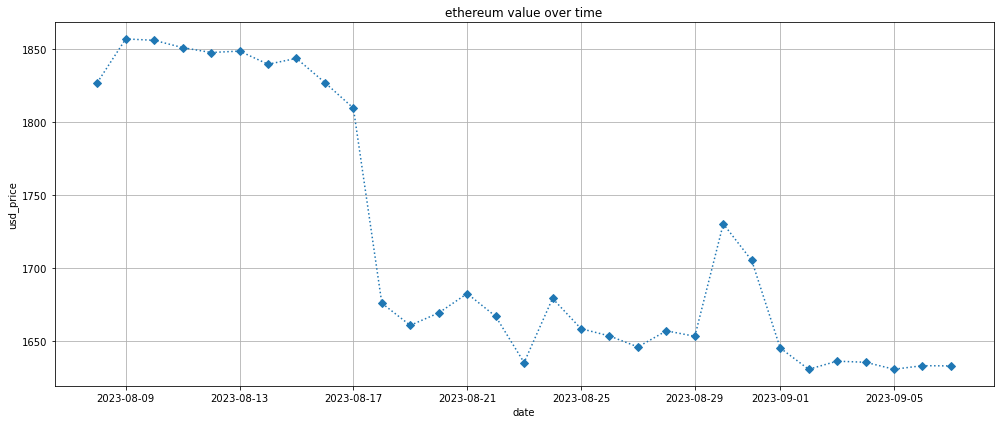

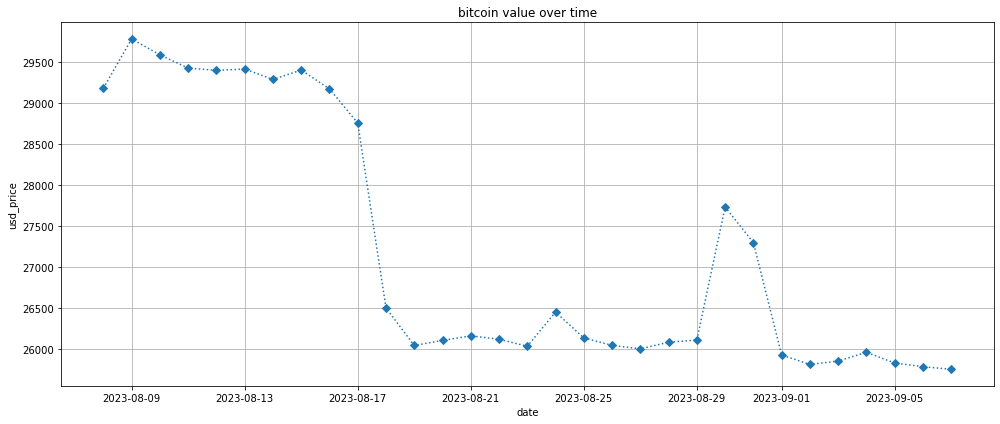

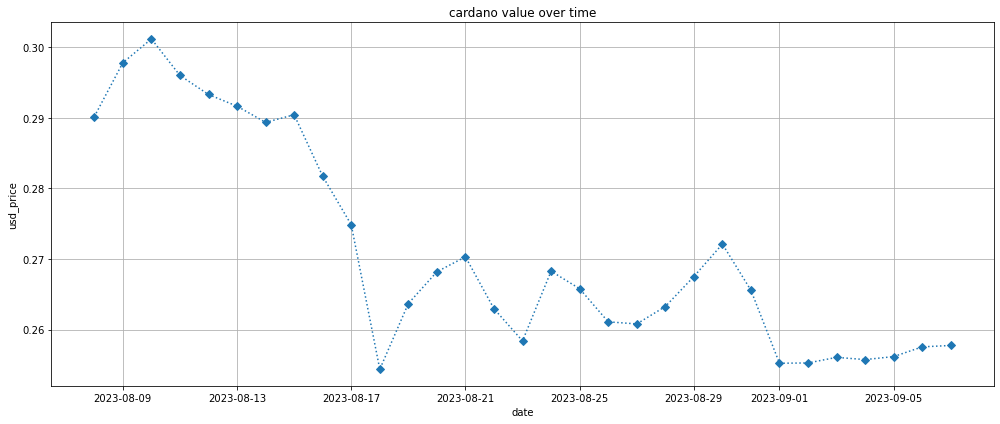

In [6]:
### all plots saved on their own

for coin in coins:
    sql_query = "select *  from coin_price_usd where coin_id = '"+coin+"' and date between '"+from_date+"T00:00:00' and '"+to_date+"T00:00:00'"

    dftoplteth = pd.read_sql_query(sql_query, engine)
    dftoplteth['date'] = pd.to_datetime(dftoplteth['date'])
    dftoplteth = dftoplteth.sort_values(by='date')
    
    plt.figure(figsize=(14, 6))
    plt.plot(dftoplteth['date'], dftoplteth['current_price.usd'], marker='D', linestyle=':')
    plt.title(coin+' value over time')
    plt.xlabel('date')
    plt.ylabel('usd_price')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    plt.savefig(os.getcwd()+'/plots/'+coin+'_30day_plot.png')
    plt.close()


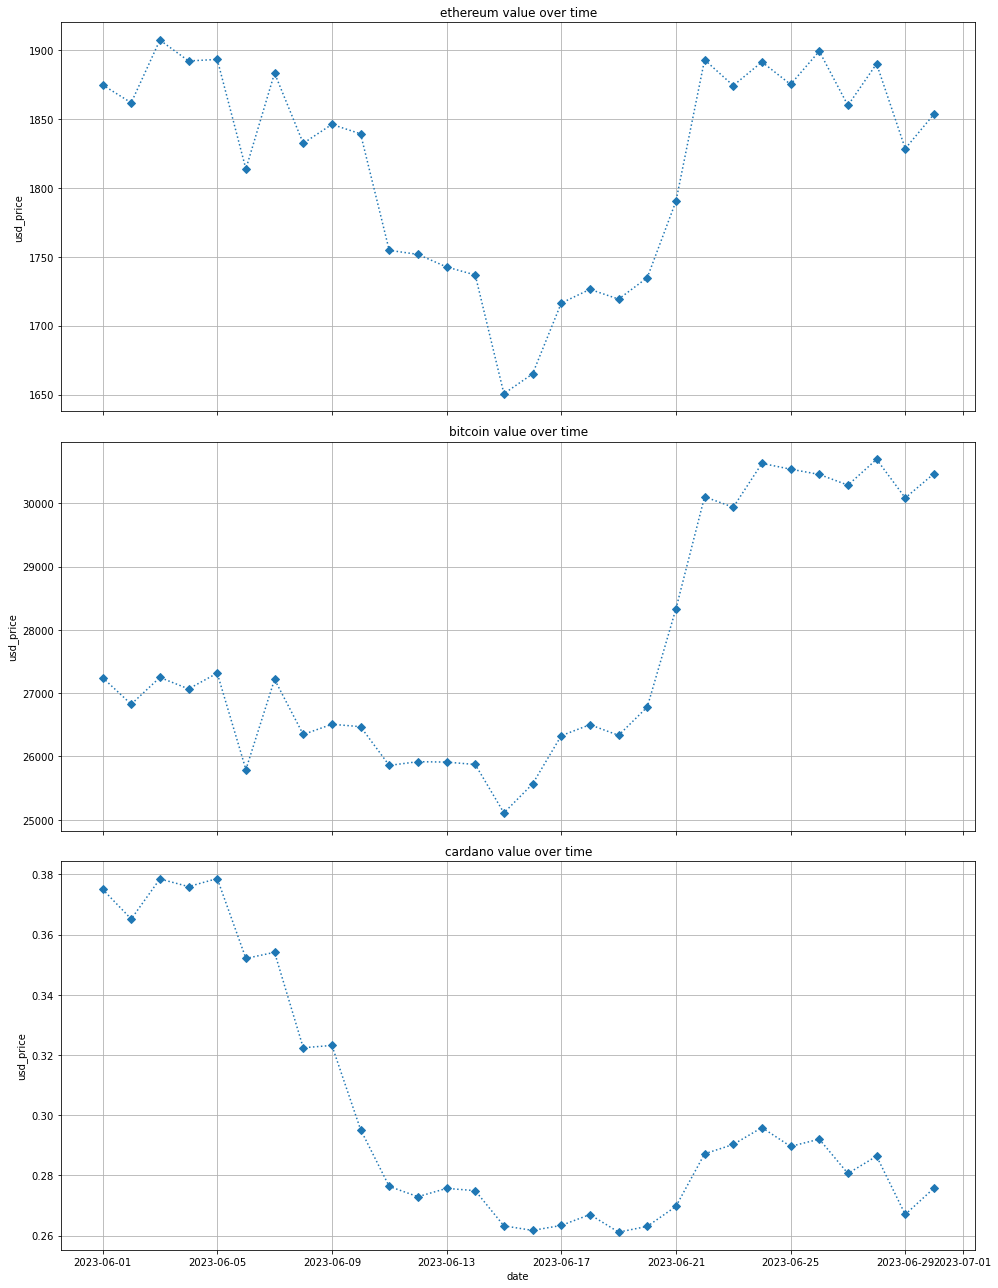

In [7]:
### all plots in the same image

fig, axs = plt.subplots(len(coins), 1, figsize=(14, 6*len(coins)), sharex=True)


for i, coin in enumerate(coins):
    sql_query = "select * from coin_price_usd where coin_id = '"+coin+"' and date between '2023-06-01T00:00:00' and '2023-06-30T00:00:00'"
    dftoplteth = pd.read_sql_query(sql_query, engine)
    dftoplteth['date'] = pd.to_datetime(dftoplteth['date'])
    dftoplteth = dftoplteth.sort_values(by='date')

    axs[i].plot(dftoplteth['date'], dftoplteth['current_price.usd'], marker='D', linestyle=':', label=coin)
    axs[i].set_title(coin+' value over time')
    axs[i].set_ylabel('usd_price')
    axs[i].grid(True)


plt.xlabel('date')

plt.tight_layout()
plt.savefig(os.getcwd()+'/plots/all_coins_30day_plot.png')
plt.show()

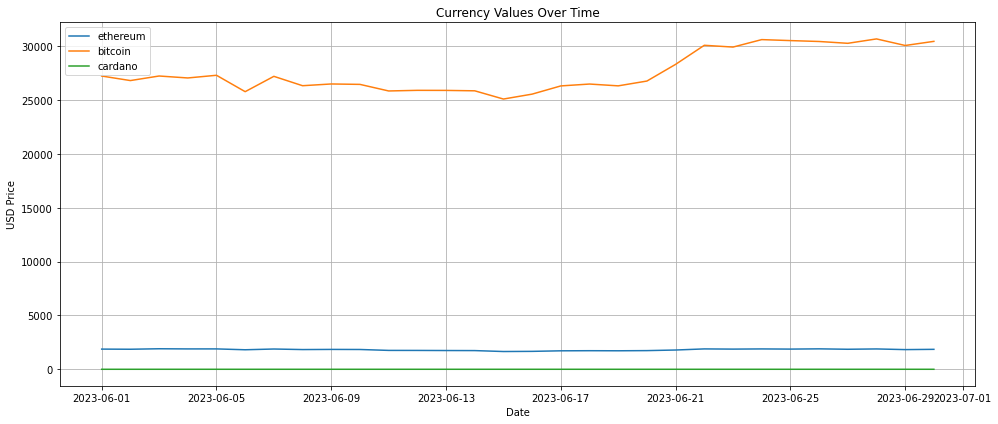

In [8]:
### plotting all coins in the same plot (problems with scale)

plt.figure(figsize=(14, 6))


for coin in coins:
    sql_query = "select * from coin_price_usd where coin_id = '"+coin+"' and date between '2023-06-01T00:00:00' and '2023-06-30T00:00:00'"
    dftoplteth = pd.read_sql_query(sql_query, engine)
    dftoplteth['date'] = pd.to_datetime(dftoplteth['date'])
    dftoplteth = dftoplteth.sort_values(by='date')

    plt.plot(dftoplteth['date'], dftoplteth['current_price.usd'], label=coin)

plt.title('Currency Values Over Time')
plt.xlabel('Date')
plt.ylabel('USD Price')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig(os.getcwd()+'/plots/all_coins_in_one_30day_plot.png')
plt.show()

In [9]:
# Close the connection when done
connection.close()